<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_dl.png" alt="Drawing" style="width:1700px;">


# <center> **11. CNN FUNDAMENTALS!** </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

## **Outline**
1. **Pre-trained CNN Models**
2. **Most common CNN architectures**
3. **Transfer Lerning: using pre-trained DL models**
4. **Data Augmentation**



In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ia2


In [ ]:
#@title Load libraries { display-mode: "form" }
#@markdown Here is important to change to GPU

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

2.7.0


#**1. Pre-trained CNN Models**

**CNN models are slowly but in training process**, then we can use a **pre-trained model**

- A pre-trained model is a model that was trained on a large benchmark dataset, for instance on image-net dataset.
- It is almost impossible to built and train a large deep learning model without a robust computational support.
- You can improve an existing architecture, you dont start with an empty model.
- **A new standard for industry best practices**
- You can use for  cases from **transfer learning**, **prediction**, and **feature extraction**

- **[ImageNet](http://www.image-net.org/):**  is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories.
    - ImageNet Large-Scale Visual Recognition Challenge (ILSVRC)
    - 1000 images in each of 1000 categories

**Go to the action!**
    - We are going to load and use a very well know CNN architecture. In next subsection we explain a little about each strategy.


In [ ]:
#@title **code** Load my first pre-trained CNN
model_ResNet152 = tf.keras.applications.ResNet152(weights='imagenet')
model_ResNet152.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

im_ele1:  <class 'PIL.Image.Image'> (1, 224, 224, 3)


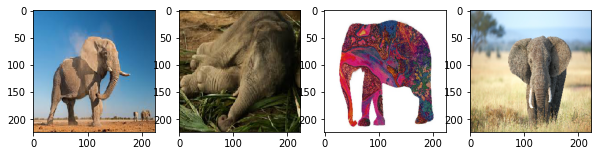

In [ ]:
#@title **code:** To play with a pre-trained image


im_ele1 = tf.keras.preprocessing.image.load_img("imgs/ele4.jpeg", target_size=(224, 224))
im_ele2 = tf.keras.preprocessing.image.load_img("imgs/ele1.jpeg", target_size=(224, 224))
im_ele3 = tf.keras.preprocessing.image.load_img("imgs/ele3.jpg", target_size=(224, 224))
im_ele4 = tf.keras.preprocessing.image.load_img("imgs/ele2.jpg", target_size=(224, 224))
ima_elep1 = np.expand_dims(tf.keras.preprocessing.image.img_to_array(im_ele1), axis=0);
ima_elep2 = np.expand_dims(tf.keras.preprocessing.image.img_to_array(im_ele2), axis=0);
ima_elep3 = np.expand_dims(tf.keras.preprocessing.image.img_to_array(im_ele3), axis=0);
ima_elep4 = np.expand_dims(tf.keras.preprocessing.image.img_to_array(im_ele4), axis=0);


print ( "im_ele1: ", type(im_ele2), ima_elep1.shape )

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 4, 1)
ax = plt.imshow(im_ele1);
ax = fig.add_subplot(1, 4, 2)
ax = plt.imshow(im_ele2);
ax = fig.add_subplot(1, 4, 3)
ax = plt.imshow(im_ele3);
ax = fig.add_subplot(1, 4, 4)
ax = plt.imshow(im_ele4);

In [ ]:
#@title **code** predict image classes
features_res = model_ResNet152.predict(ima_elep2)
print(features_res.shape, np.argmax(features_res, axis=1))
tf.keras.applications.imagenet_utils.decode_predictions(features_res)

(1, 1000) [296]


[[('n02134084', 'ice_bear', 0.2798912),
  ('n02504013', 'Indian_elephant', 0.15400206),
  ('n02074367', 'dugong', 0.08255243),
  ('n02125311', 'cougar', 0.07780144),
  ('n02398521', 'hippopotamus', 0.06976517)]]

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Test with other images and show results.
- Try with images out of set of classes


im1:  <class 'PIL.Image.Image'> (1, 224, 224, 3)


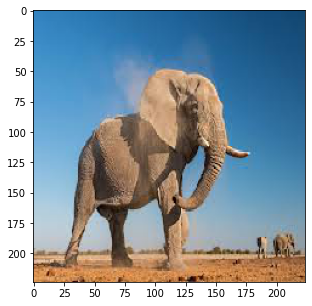

In [ ]:
im1 = tf.keras.preprocessing.image.load_img("imgs/ele4.jpeg", target_size=(224, 224))
ima1 = np.expand_dims(tf.keras.preprocessing.image.img_to_array(im1), axis=0)
plt.figure(figsize=(10,5))
plt.imshow(im1);
print ( "im1: ", type(im1), ima1.shape )

In [ ]:
#@title **code** predict image classes
features_res = model_ResNet152.predict(ima1)
print(features_res.shape, np.argmax(features_res, axis=1))
tf.keras.applications.imagenet_utils.decode_predictions(features_res)

(1, 1000) [918]


[[('n06785654', 'crossword_puzzle', 0.987703),
  ('n06359193', 'web_site', 0.012226235),
  ('n07565083', 'menu', 1.328379e-05),
  ('n03692522', 'loupe', 9.6279e-06),
  ('n06596364', 'comic_book', 8.109159e-06)]]

In [1]:
#@title **code student:** To play with a pre-trained image




64 (7, 7, 3, 64)


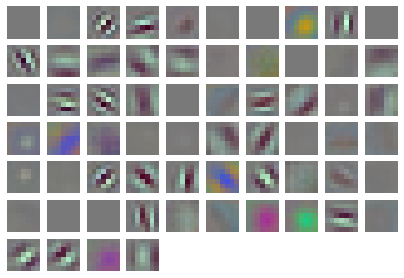

In [ ]:
#@title **code** representation basis
w = model_ResNet152.get_weights()[0]
plt.figure(figsize=(7,7))
w = (w-np.min(w))/(np.max(w)-np.min(w))
print (w.shape[-1], w.shape)
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:,:,:,i])
    plt.axis("off")

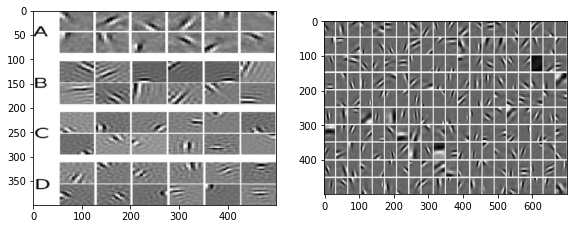

In [ ]:
#@title DId you see the importance?. It is very close to  some evidence of receptive field responses

im_v1 = tf.keras.preprocessing.image.load_img("imgs/v1.png", target_size=(400, 500))
im_v2 = tf.keras.preprocessing.image.load_img("imgs/gabor.png", target_size=(500, 700))

fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(1, 4, 1)
ax = plt.imshow(im_v1);
ax = fig.add_subplot(1, 4, 2)
ax = plt.imshow(im_v2);

# **2. Most common CNN architectures**

Today, there is many CNN architectures available for many different tasks. Among the most important, we can list:


### **2.1 LeNet**
Proposed in [gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf). Used on large scale to automatically classify hand-written digits

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/lenet.png">

- CNNs are the foundation of modern state-of-the art deep learning-based computer vision.
-  It only has 7 layers, CNN: (C1, C3 and C5), Pool: (P1, P2) and Fully:(F1, F2)
- It was able to achieve error rate below 1% on the MNIST data set

### **2.2 AlexNet**

Proposed in [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), it is the first large convolutional net.

The network is similar to LeNet  but deeper, with more filters stacked convolutional layers.

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Alexnet.png">
- Similar to Lenet but with 5 conv2D and 3 fully dense layers
- It was a winner of 2012 ImageNet ILSVRC challenge **(error 16.4)**
- Relu activation function is used instead of Tanh to add non-linearity
- Use dropout to deal with overfitting
- The kernels of the third convolutional layer are connected to all kernel maps in the second layer
- AlexNet takes 90 epochs which were trained for 6 days simultaneously on two Nvidia Geforce GTX 580 GPUs
- 60 million parameters

### **2.3 VGGNet**

Introduced in [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). There exist two versions **VGG16**, **VGG19**

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/VGG.png">

The model achieves 92.7% top-5 on Imagenet and trained for weeks and was using NVIDIA Titan Black GPU’s.
- 16/19 connvolutional layers + pooling + fully connected
- Input is 224 x 224 x 3 images
- Filters are 3 x 3 that basically  capture the notion of left/right, up/down, center
- Five max-pooling layers
- Three Fully-Connected (FC) layers
- Hidden layers have rectification (ReLU)
- It is slow and the model is over 533MB
- 180 million parameters
-  VGG NET win in ILSVRC 2014 with an error of **7.3**

### **2.4 ResNet**

Feedforward neural networks with shortcut connections. Proposed in [Deep Residual Learning for Image Recognition
](https://arxiv.org/pdf/1512.03385.pdf)


<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/resnet.png">

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/resnet2.png">



- Deeper network starts to converge, a degradation problem has been exposed
- This architecture is easy to optimize, but the “plain” networks
- ResNet model has fewer filters and lower complexity than VGG nets
- More layers is better but because of the vanishing gradient problem
    - There is Resnet with 34, 101 and 152 layers
- Resnet win ILSVRC challence on 2015 with an **error 3.6**.
### BETTER THAN HUMAN PERFORMANCE!

### **2.5 GoogLeNet (Inception V1)**

Proposed in [Going deeper with convolutions](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf?source=post_page---------------------------)

<img width="1000px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Googlenet.png">

- Winner of Imagenet 2014 (Second position for VGG)
- 7 million parameters
- **Network in networks:** It contains 1×1 Convolution at the middle of the network

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/oneConv1.png">
A total of (14×14×48)×(5×5×480) = 112.9M operations
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/OneConv2.png">

First: (14×14×16)×(1×1×480) = 1.5M

Second: (14×14×48)×(5×5×16) = 3.8M


Total.  1.5M + 3.8M = 5.3M

- Also reduce the overfitting problem.
- A global average pooling is used at the end of the network instead of a fully connected layers
- Inception win the ILSRVC challenge of 2015 with an error of **3.38**

### **2.6 InceptionV3**

Proposed in CVPR [Rethinking the Inception Architecture for Computer Vision](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf?source=post_page---------------------------)

<img width="1000px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/inceptionv.png">


- **MODULE A: Factorizing Convolutions:**  reduce the number of connections/parameters without lost efficiency
    - Two 3×3 convolutions replaces one 5×5 convolution.
      - 1 layer of 5x5=25.
      - 2 layers of 3x3= (3x3)*2=18
      - 28% parameter reduction
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/inception1.png">

- **MODULE B: Factorization Into Asymmetric Convolutions:**
    - a 3X3 filter is replaced by one filter of 3x1  followed by one 1x3 convolution
        - 3x3=9 but (1x3)+ (3x1) = 6 (33% parameter reduction)
    
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/inception2.png">     

- **MODULE C: Factorization Into Asymmetric Convolutions:**

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/inception3.png">



- It has a total of 42 layers,
- lower error rate for image classification in ILSVRC in 2016
- Much more efficient than VGGNet

### **2.7 Inception-ResNet-V2**

Proposed in CVPR [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/pdf/1602.07261.pdf)

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/inception-resnet.png">



- Converting Inception modules to Residual Inception blocks.
- Adding more Inception modules.
- Adding a new type of Inception module (Inception-A) after the Stem module.


### **2.8 Xception**

Proposed in CVPR [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/pdf/1610.02357.pdf)

<img width="600px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/xception.png">

This net is a  extreme version of Inception, with a modified depthwise separable convolution.

- The results shows a better performance than Inception-v3
- Modify the design, by doing, the pointwise convolution followed by a depthwise convolution
- In Xception, there is **NO** intermediate ReLU non-linearity  in the defined  depthwise module
- There are residual (or shortcut/skip) connections


### **2.9 Mobilenet**

Proposed in CVPR [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/pdf/1801.04381.pdf)

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/mobilenet.png">

Designed for restricted resources or embedded application, whose main features are the small size, low-latency and low-power rather than the classification performance.

- This net fully  uses depthwise separable convolutions to reduces the number of parameters
- The net follows the structure [depthwise - pointwise] convolutions

Now, there exist the [mobilenet-V2](https://arxiv.org/pdf/1801.04381.pdf)

- Linear bottlenecks between the layers
- shortcut connections between the bottlenecks

### **2.10 Densenet**

Proposed in CVPR [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993)

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/densenet.png">

- This net is quite similar to Resnet but concatenate previous layers rather than merge using and additive method.

- Improve the declined accuracy caused by the vanishing gradient

- This image shows a block of five layers dense with a growth rate of four
- Transition Layer applies batch normalization using downsampling when further layers has lower dimension

#### **Brief comparison**

A summary of available models and their respective perfomance on Imagent is [here](https://keras.io/api/applications/)

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/architectcomparison.png">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Evaluate both, activations and filter responses for almost two different networks

- Change size of input in pretrained network. Is it possible? What happened



In [ ]:
#@title **code student:** change size

model_DenseNet121 = tf.keras.applications.DenseNet121(weights='imagenet')
model_DenseNet121.summary()


33202176/33188688 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
#@title **code student:** activations from other pre-trained net


layer_outputs = [layer.output for layer in model_DenseNet121.layers ]
layer_outputs


[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'zero_padding2d')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1/conv')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1/bn')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1/relu')>,
 <KerasTensor: shape=(None, 114, 114, 64) dtype=float32 (created by layer 'zero_padding2d_1')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'pool1')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_0_bn')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_0_relu')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'conv2_block1_1_conv')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'conv2_bloc

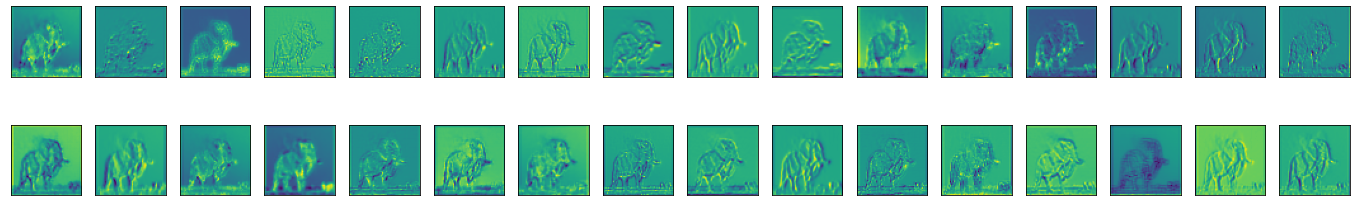

In [ ]:
activation_model = tf.keras.models.Model(inputs=model_DenseNet121.input, outputs=layer_outputs)
array = np.expand_dims(im1, axis=0)
activations = activation_model.predict(array)
plt.figure(figsize=(24,4))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[12][0,:, :, i], cmap='viridis')

# **3. Transfer Lerning: using pre-trained DL models**
- "*standing on the shoulder of giants*". Chartres
- "*If I have seen further it is by standing on the shoulders of Giants*". Newton

A way to quickly solve a classification problem from a pre-trained image. In transfer learning for image classification if a model was trained on a large and general enough dataset, this model could be used as a generic model of the visual world.

- Start from learning patterns of other problems.

**Advantajes**

- It work into same deep learning scheme.
- Some SoA are based on transfer learning

**Steps**

- Load a pre-trained model: Inception, Mobilenet
- Train some layers and leave the others frozen
    - frozen layer does not change during training

##### **CNN Models**

The CNN achitectures, according to Yosinski et al. (2014), *if first-layer features are general and last-layer features are specific, then there must be a transition from general to specific somewhere in the network*

- if you’ve a small dataset and a large number of parameters, you’ll leave more layers frozen to avoid overfitting.
- The base convolutional network already contains  visual features that are generically for image problems, while the final is specific to the original classification task.
    

**Go again to the action!**

We should load cifar10

In [ ]:
#@title **code:**  Load cifar 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print ("CIFAR 10")
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [ ]:
#@title **code** organize data
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000 y_train: (50000, 10)
Number of images in x_test 10000 y_test:  (10000, 10)


### **3.1. Freeze the convolutional base**

A basic transfer learning approach is implemented when *new dataset* is **small and similar** to *original dataset*

- we will be training only the classifiers (FC layers). To train the entire entire network can lead to **overfitting**
- The first step is to select a pre-trained model: Inception, VGG, Resnet, among others.
- Then freeze all layers except FC layers and re-train.

We will try with mobilenet because reduced size (16MB)

In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                

In [ ]:
#@title **code** create some layers to add
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()# To mobilenet cnns

In [ ]:
#@title **code** we adapt the pre-trained model in a new model

model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** summary of the models and layers to train
model_B_on_A.summary()
print("number of layers to train: ", len(model_B_on_A.trainable_variables))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
number of layers to train:  2


In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 36s 15ms/step - loss: 2.0231 - accuracy: 0.2694 - val_loss: 1.9652 - val_accuracy: 0.2854
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.9462 - accuracy: 0.2950 - val_loss: 1.9405 - val_accuracy: 0.2961
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.9276 - accuracy: 0.3026 - val_loss: 1.9356 - val_accuracy: 0.2923
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9181 - accuracy: 0.3070 - val_loss: 1.9246 - val_accuracy: 0.2995
Epoch 5/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.9120 - accuracy: 0.3083 - val_loss: 1.9204 - val_accuracy: 0.2989
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9080 - accuracy: 0.3103 - val_loss: 1.9202 - val_accuracy: 0.3066
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9042 - accuracy: 0.3112 - val_loss: 1.9139 -

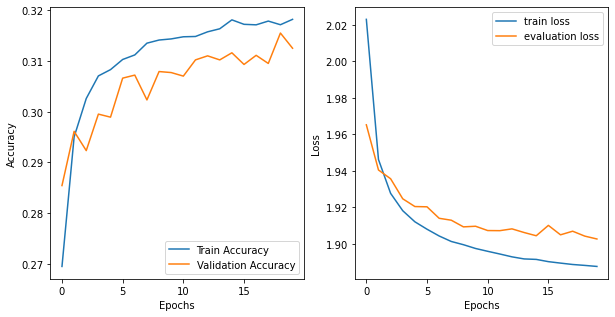

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Fine tunning**

A typical way to increase performance is to fine-tunne the weights of the top layers of the pre-trained model. The training process will force to move the weights through specific dataset. It should be moved "a little" to reamins with feature maps structure


In [ ]:
#@title **code** we unfreeze layers to re-train "a little" the network
model_A.trainable = True
print("Total ayers of Mobilenet: ", len(model_A.layers))
for layer in model_A.layers[:100]:
  layer.trainable =  False
print("Total ayers of Mobilenet: ", len(model_A.layers))

Total ayers of Mobilenet:  154
Total ayers of Mobilenet:  154


In [ ]:
#@title **code** number of layers to train now, did you see?
model_B_on_A.summary()
len(model_B_on_A.trainable_variables)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 1,874,250
Non-trainable params: 396,544
_________________________________________________________________


56

In [ ]:
#@title **code** no we  fin tune the model
opt = tf.keras.optimizers.SGD(lr=learning_rate/5, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(x_train, y_train, epochs=10,verbose=1, batch_size=32,validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1563/1563 [==============================] - 47s 27ms/step - loss: 1.7121 - accuracy: 0.4523 - val_loss: 2.1052 - val_accuracy: 0.3343
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2976 - accuracy: 0.5806 - val_loss: 1.7494 - val_accuracy: 0.4692
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3486 - accuracy: 0.5734 - val_loss: 1.6383 - val_accuracy: 0.5409
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1925 - accuracy: 0.6106 - val_loss: 1.3072 - val_accuracy: 0.6150
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1065 - accuracy: 0.6388 - val_loss: 1.0499 - val_accuracy: 0.6505
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0602 - accuracy: 0.6544 - val_loss: 1.0986 - val_accuracy: 0.6213
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0523 - accuracy: 0.6570 - val_loss: 1.2010 -

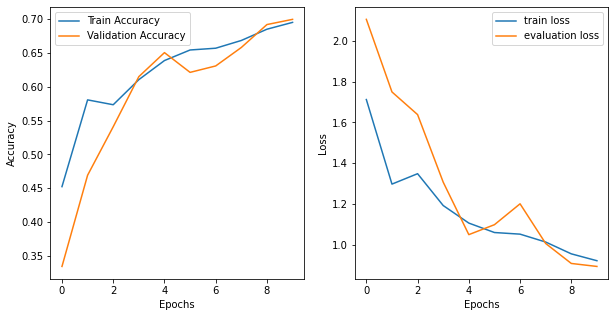

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Adapting net: adding , training and freezing specific layers**

In some cases, we need to re-train more layers and *personalize* deeply the network. So, we can doing same procedure but only freezing first base layers

In [ ]:
#@title **code** we can change as we want the net, for instance adding new layers
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(10, activation='softmax')

In [ ]:
#@title **code** we contruct and define which layers to train
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_B_on_A.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 256)               327936    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,620,106
Trainable params: 362,122
Non-

6

In [ ]:
#@title **code** 1. first to learn FC

opt = tf.keras.optimizers.SGD(lr=learning_rate/2, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 25s 14ms/step - loss: 0.7547 - accuracy: 0.7414 - val_loss: 0.8632 - val_accuracy: 0.7068
Epoch 2/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6889 - accuracy: 0.7574 - val_loss: 0.8563 - val_accuracy: 0.7089
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6762 - accuracy: 0.7592 - val_loss: 0.8558 - val_accuracy: 0.7126
Epoch 4/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6659 - accuracy: 0.7622 - val_loss: 0.8616 - val_accuracy: 0.7055
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6585 - accuracy: 0.7644 - val_loss: 0.8593 - val_accuracy: 0.7097
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6495 - accuracy: 0.7669 - val_loss: 0.8699 - val_accuracy: 0.7079
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6428 - accuracy: 0.7684 - val_loss: 0.8667 -

In [ ]:
#@title **code** 2. Now, fine-tune other layers

model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
#for layer in model_A.layers[:100]:
#  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total ayers of model_B_on_A:  155
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,620,106
Trainable params: 2,585,994
Non-trainable params: 34,112
_________________________________________________________________


162

In [ ]:
#@title **code**  compile the model

opt = tf.keras.optimizers.SGD(lr=learning_rate/500, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=30,verbose=1, batch_size=32,validation_data=(x_test, y_test))


Epoch 1/30
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3128 - accuracy: 0.5260 - val_loss: 2.0162 - val_accuracy: 0.5078
Epoch 2/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9703 - accuracy: 0.5380 - val_loss: 1.5510 - val_accuracy: 0.5592
Epoch 3/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7413 - accuracy: 0.5478 - val_loss: 1.4525 - val_accuracy: 0.5654
Epoch 4/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6098 - accuracy: 0.5505 - val_loss: 1.3826 - val_accuracy: 0.5650
Epoch 5/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5118 - accuracy: 0.5573 - val_loss: 1.3330 - val_accuracy: 0.5647
Epoch 6/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4390 - accuracy: 0.5608 - val_loss: 1.2949 - val_accuracy: 0.5708
Epoch 7/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3842 - accuracy: 0.5665 - val_loss: 1.2624 -

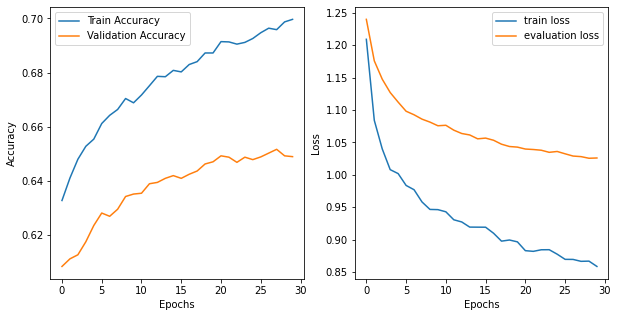

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **3.3 Concluding remarks**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/TL_1.png" style="width:500px">

- Very Deep Networks are expensive to train and their could take weeks to train.
- If new dataset is small and similar to original dataset then train the FC layers
- If new dataset is larger and similar to original dataset then we fine-tune through the full net
    - You can freeze the first layers, they are common edges
- Train the entire model but you can summarize the model
    - add FC layers
    - set the weights for first layers.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Design different experiments according to figure. Justify the selection of use different classes and levels of transfer learning.
    - Try with  other architecture
- Use a transfer learning strategy to train only middle layers.     

- Use Transfer learning for CIFAR-100

- Now, you have a lot of tools to  start your I.A.2 project.


Go a head!


In [ ]:
#@title **code student:** activations from other pre-trained net






#4. **DATA AUGMENTATION**

To augment the dataset allows to enrich the representation from training data, and allows to avoid some typical variance souces. The actual transformation are rotation, crop, shifts, shear, zoom, flip, reflection, normalization . For doing so, `ImageDataGenerator` class allows to generate batches of image data.

In [ ]:
#@title **code**: ImagedataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen_cifar = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, rotation_range=45, horizontal_flip=True)
datagen_cifar.fit(x_train)

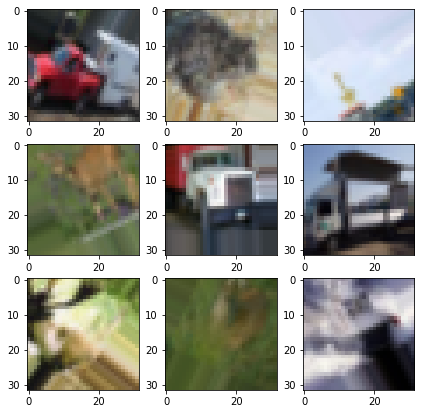

In [ ]:
#@title **code** To visualize some transformed data
plt.figure(figsize=(7,7));
plt.xticks([]);
plt.yticks([]);
plt.grid(False);

for X_batch, y_batch in datagen_cifar.flow(x_train, y_train, batch_size=9):
    for i in range(9):
      plt.subplot(330 + 1 + i)
      plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.cm.binary);
    plt.show()
    break

In [ ]:
#@title **code** Train model with generated data
it_train = datagen_cifar.flow(x_train, y_train, batch_size=64)


opt = tf.keras.optimizers.SGD(learning_rate=0.0000001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(it_train, epochs=30, validation_data=(x_test, y_test))



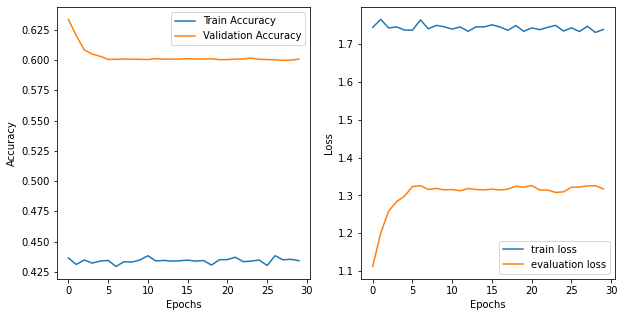

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code student:**  try with data augmentation





# References

[1. A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[2. Popular networks](https://neurohive.io/en/popular-networks/vgg16/)

[3. Keras applications](https://keras.io/applications/)

[4. A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)


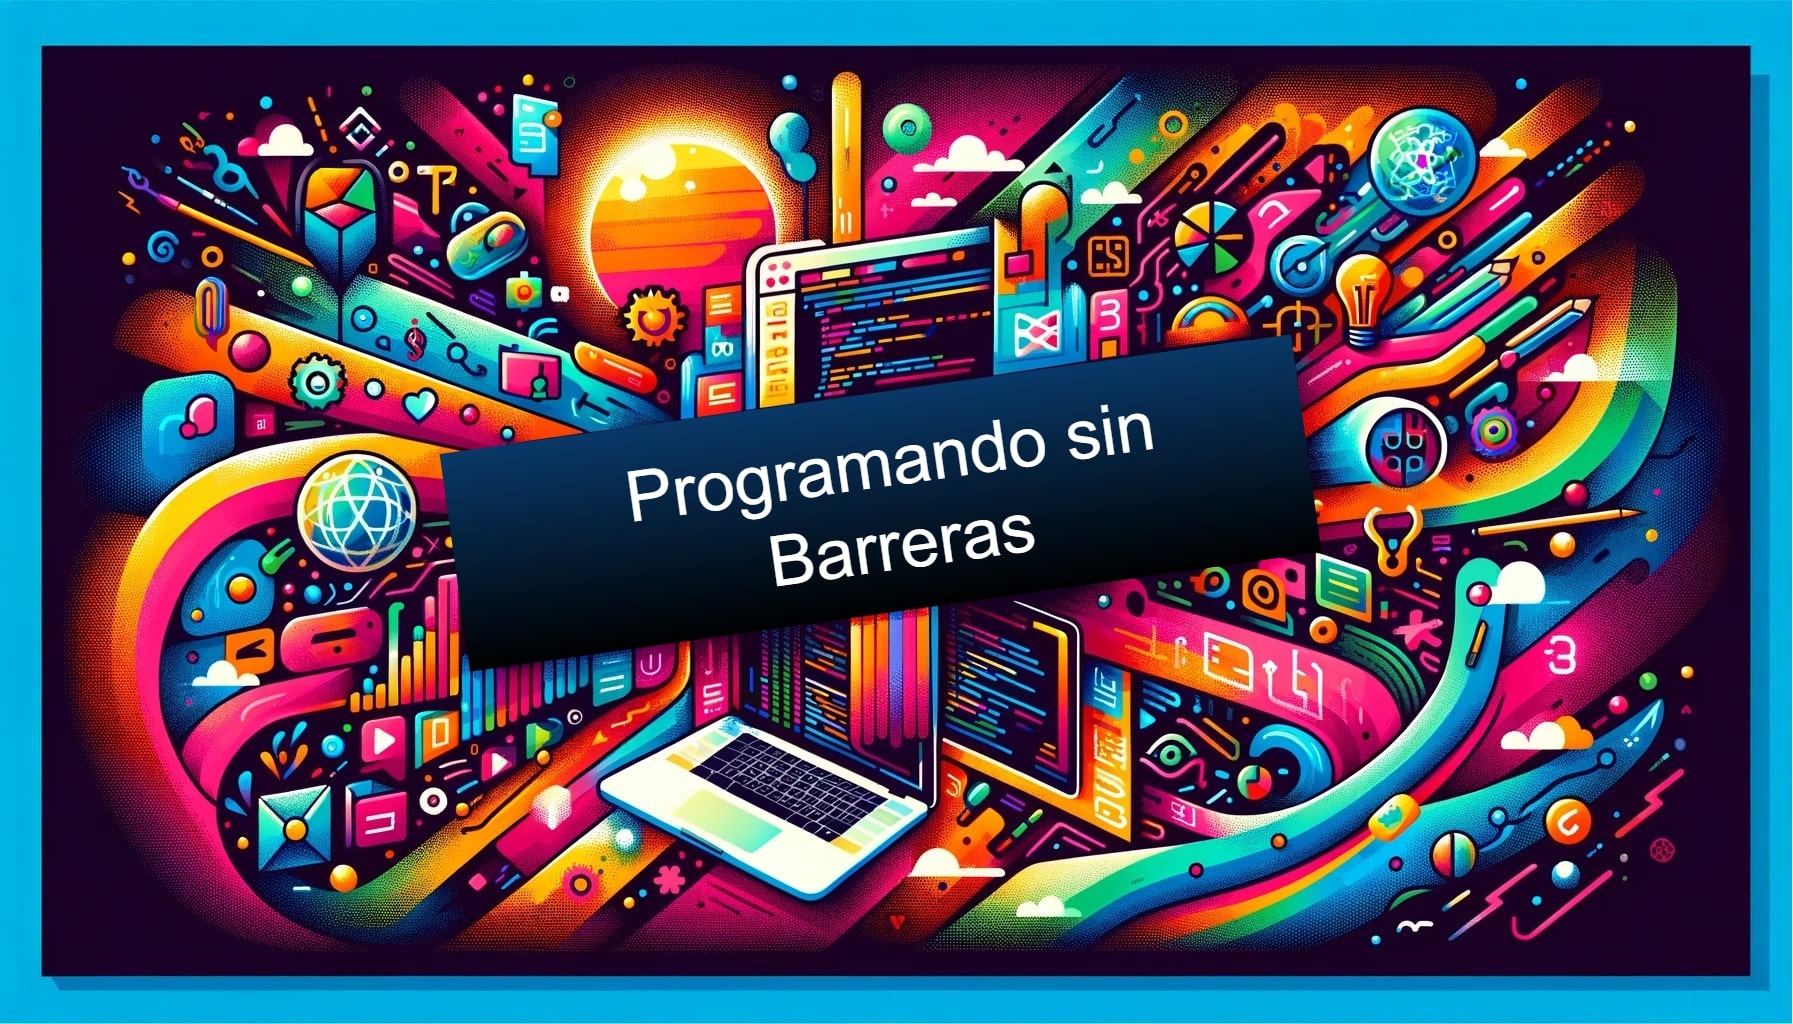